In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
true_data = pd.read_csv('./../../processed_VideoCommentsThreatCorpus.csv')

pred_data_mistral = pd.read_csv('solomistral_final.csv')
pred_data_mistral_nemo = pd.read_csv('solomistral-nemo_final.csv')
pred_data_mistral_small = pd.read_csv('solomistral-small_final.csv')
pred_data_qwen_8 = pd.read_csv('soloqwen3-8b_final.csv')
pred_data_qwen_14 = pd.read_csv('soloqwen3-14b_final.csv')
pred_data_gemma_12 = pd.read_csv('sologemma3-12b-final.csv')
pred_data_gemma_27 = pd.read_csv('sologemma3-27b-final.csv')


In [4]:
def batch_eval(true_df: pd.DataFrame, pred_df: pd.DataFrame):
    # Map predicted labels: 0/1 → 0, 2 → 1, else → -1 (failed classification)
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1 if x == 2 else -1)

    # Merge datasets
    merged_df = true_df.merge(pred_df, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

    # Convert flags to int
    merged_df['flags'] = merged_df['flags'].astype(str).str.extract(r'(\d+)').astype(int)

    # Count failures and successes
    total_predictions = len(merged_df)
    failed_predictions = (merged_df['violence_label'] == -1).sum()
    successful_predictions = total_predictions - failed_predictions

    print(f'Total predictions: {total_predictions}')
    print(f'Failed classifications: {failed_predictions} ({failed_predictions / total_predictions:.2%})')
    print(f'Successful classifications: {successful_predictions} ({successful_predictions / total_predictions:.2%})\n')

    # Filter out failed classifications (-1) before evaluation
    merged_df = merged_df[merged_df['violence_label'] != -1]

    # Extract labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    report = classification_report(y_true, y_pred, labels=[0, 1])

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix [Neighbors]')
    plt.show()

    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0])
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])

    sns.countplot(x=y_pred, ax=ax[1])
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])

    plt.show()

In [5]:
print(pred_data_mistral_nemo['violence_label'].value_counts())

violence_label
1    4456
0    3794
2    1380
Name: count, dtype: int64


Mistral
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.7109
Precision: 0.5135
Recall: 0.5207
F1 Score: 0.5085

Confusion Matrix:
 [[6513 1848]
 [ 936  333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      8361
           1       0.15      0.26      0.19      1269

    accuracy                           0.71      9630
   macro avg       0.51      0.52      0.51      9630
weighted avg       0.78      0.71      0.74      9630



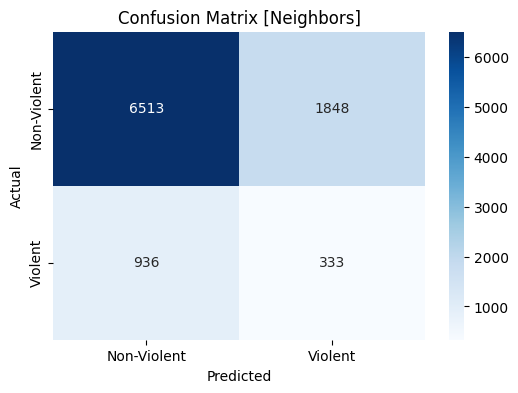

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


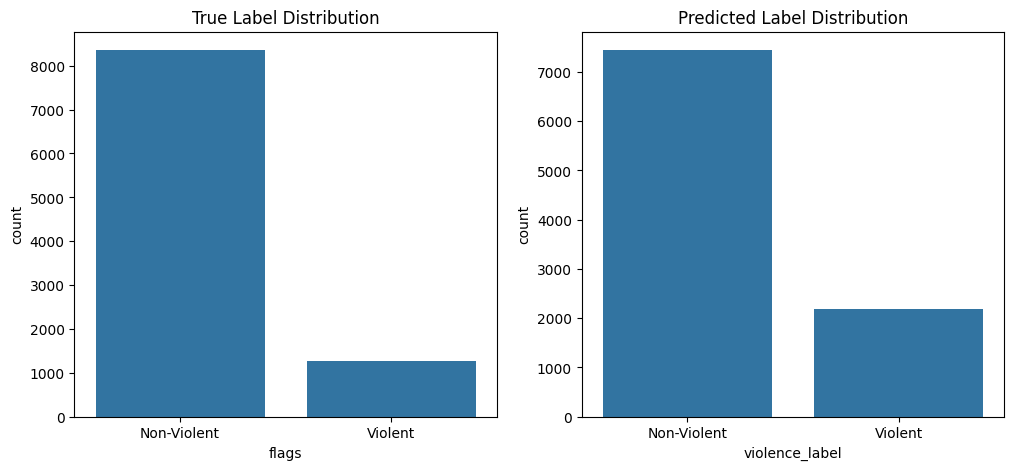

Mistral-Nemo
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.7696
Precision: 0.5140
Recall: 0.5150
F1 Score: 0.5144

Confusion Matrix:
 [[7196 1165]
 [1054  215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      8361
           1       0.16      0.17      0.16      1269

    accuracy                           0.77      9630
   macro avg       0.51      0.52      0.51      9630
weighted avg       0.78      0.77      0.77      9630



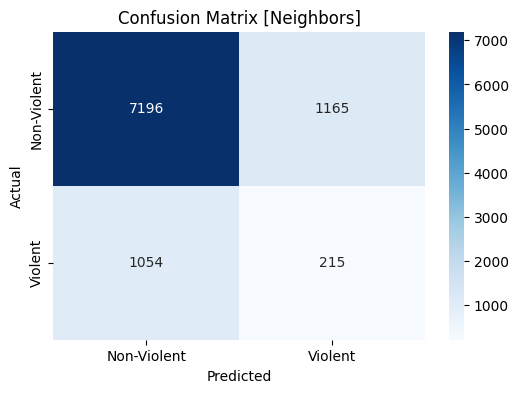

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


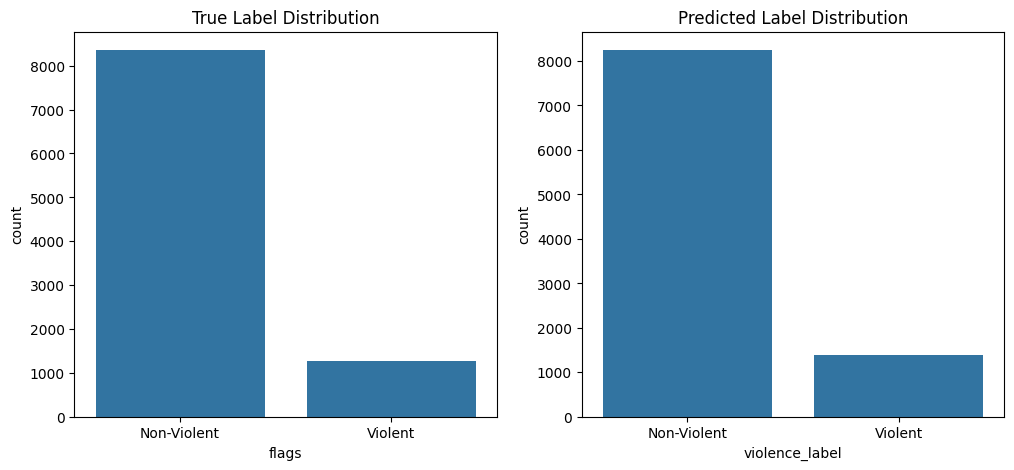

Mistral-Small
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.7886
Precision: 0.5046
Recall: 0.5039
F1 Score: 0.5037

Confusion Matrix:
 [[7445  916]
 [1120  149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      8361
           1       0.14      0.12      0.13      1269

    accuracy                           0.79      9630
   macro avg       0.50      0.50      0.50      9630
weighted avg       0.77      0.79      0.78      9630



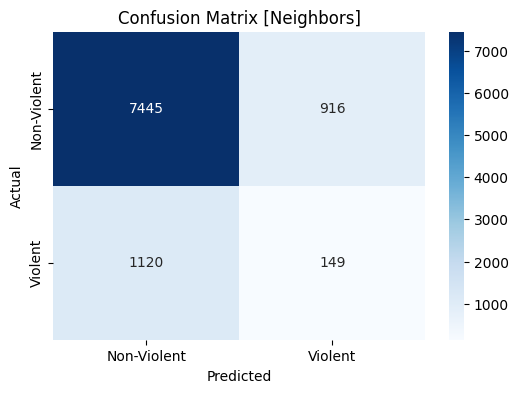

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


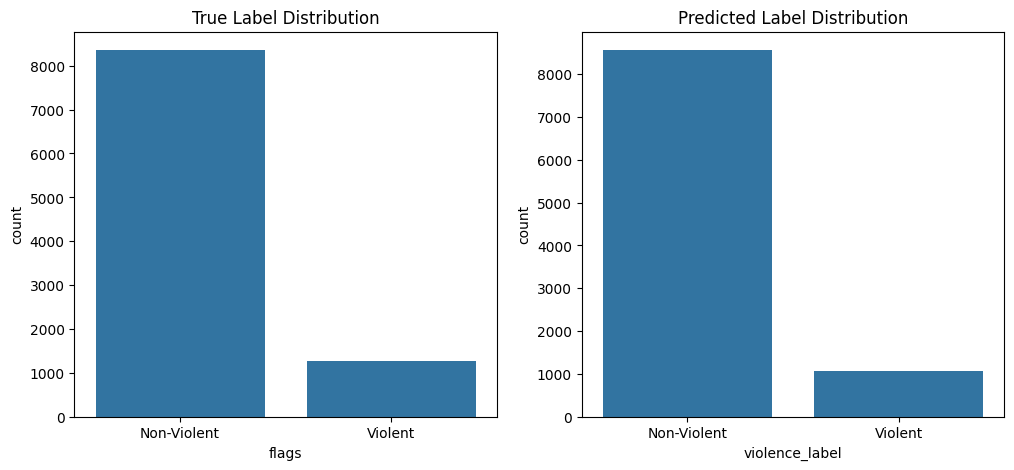

Qwen-8
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.6347
Precision: 0.5155
Recall: 0.5303
F1 Score: 0.4903

Confusion Matrix:
 [[5619 2742]
 [ 776  493]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.67      0.76      8361
           1       0.15      0.39      0.22      1269

    accuracy                           0.63      9630
   macro avg       0.52      0.53      0.49      9630
weighted avg       0.78      0.63      0.69      9630



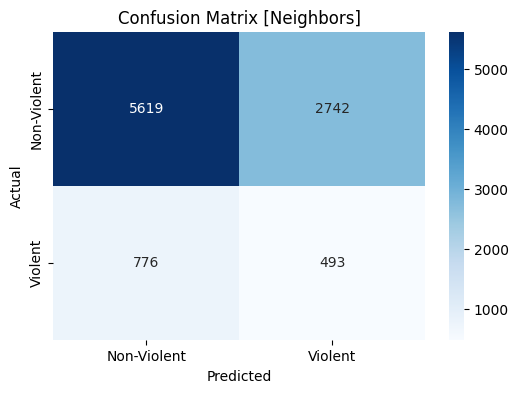

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


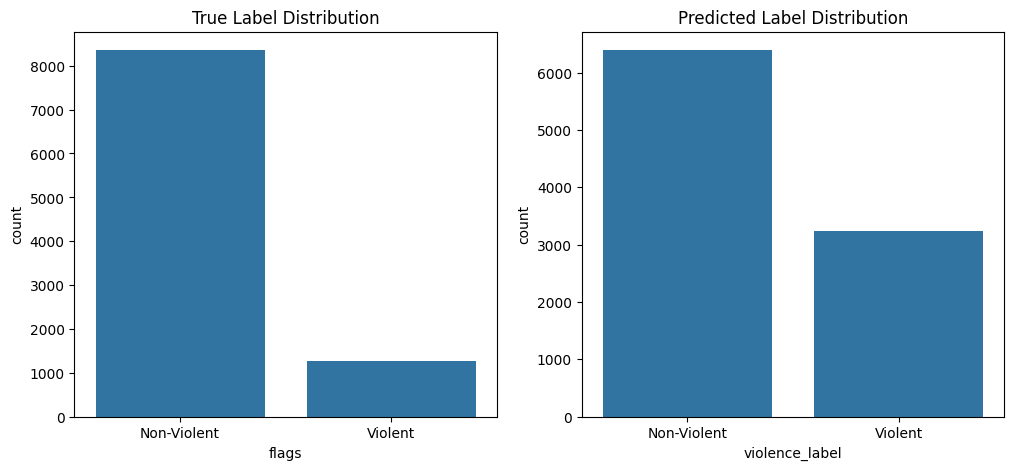

Qwen-14
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.7153
Precision: 0.5104
Recall: 0.5155
F1 Score: 0.5060

Confusion Matrix:
 [[6578 1783]
 [ 959  310]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      8361
           1       0.15      0.24      0.18      1269

    accuracy                           0.72      9630
   macro avg       0.51      0.52      0.51      9630
weighted avg       0.78      0.72      0.74      9630



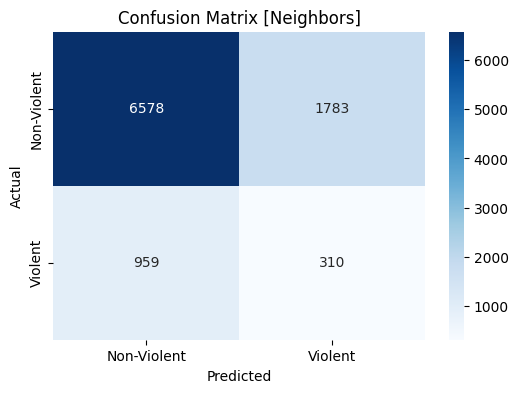

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


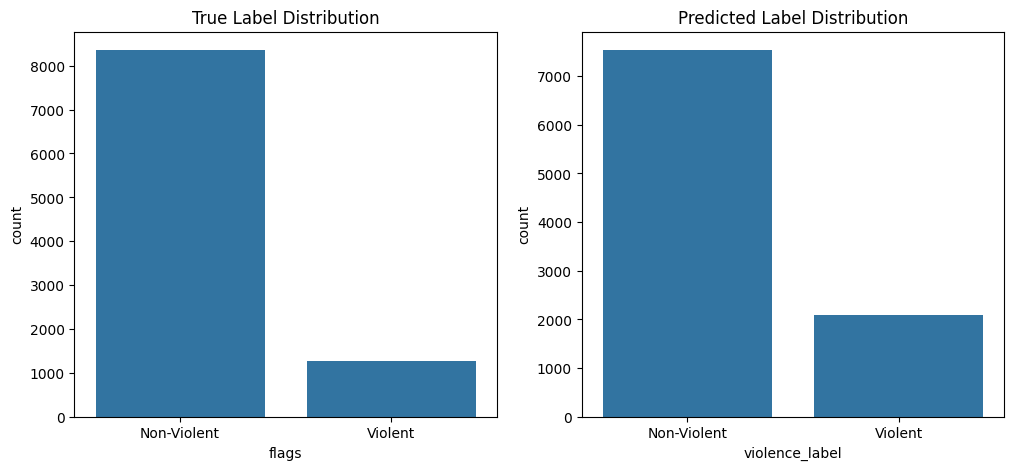

Gemma-12
Total predictions: 9629
Failed classifications: 0 (0.00%)
Successful classifications: 9629 (100.00%)

Accuracy: 0.7631
Precision: 0.5136
Recall: 0.5147
F1 Score: 0.5140

Confusion Matrix:
 [[7121 1205]
 [1076  227]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      8326
           1       0.16      0.17      0.17      1303

    accuracy                           0.76      9629
   macro avg       0.51      0.51      0.51      9629
weighted avg       0.77      0.76      0.77      9629



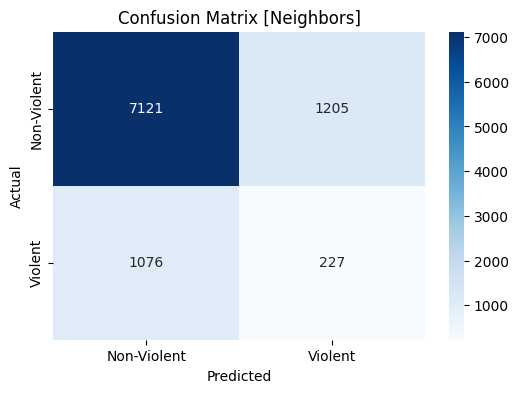

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


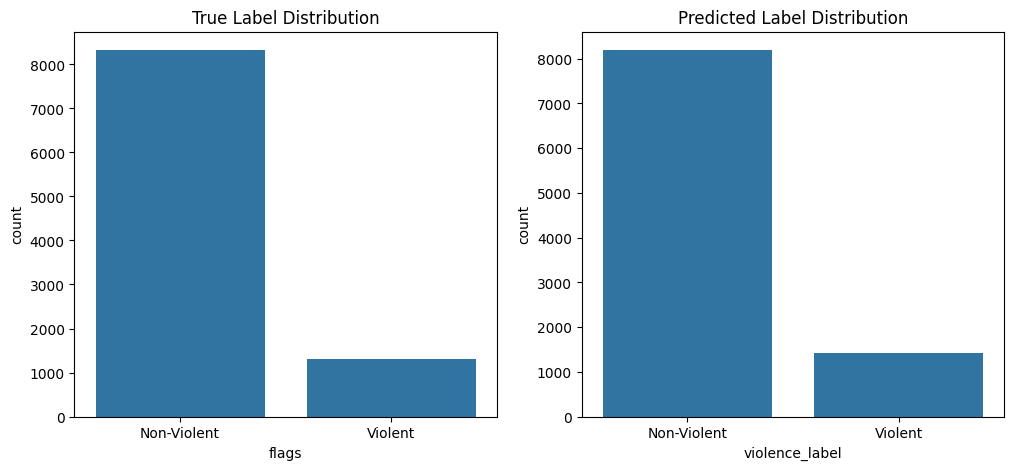

Gemma-27
Total predictions: 9629
Failed classifications: 0 (0.00%)
Successful classifications: 9629 (100.00%)

Accuracy: 0.8056
Precision: 0.5167
Recall: 0.5115
F1 Score: 0.5107

Confusion Matrix:
 [[7616  710]
 [1162  141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      8326
           1       0.17      0.11      0.13      1303

    accuracy                           0.81      9629
   macro avg       0.52      0.51      0.51      9629
weighted avg       0.77      0.81      0.79      9629



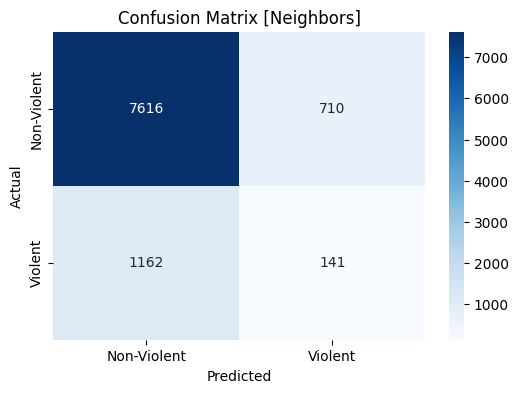

/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
/var/folders/sd/vszkk16d1fz86wky22qclxl00000gn/T/ipykernel_19821/1314237073.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


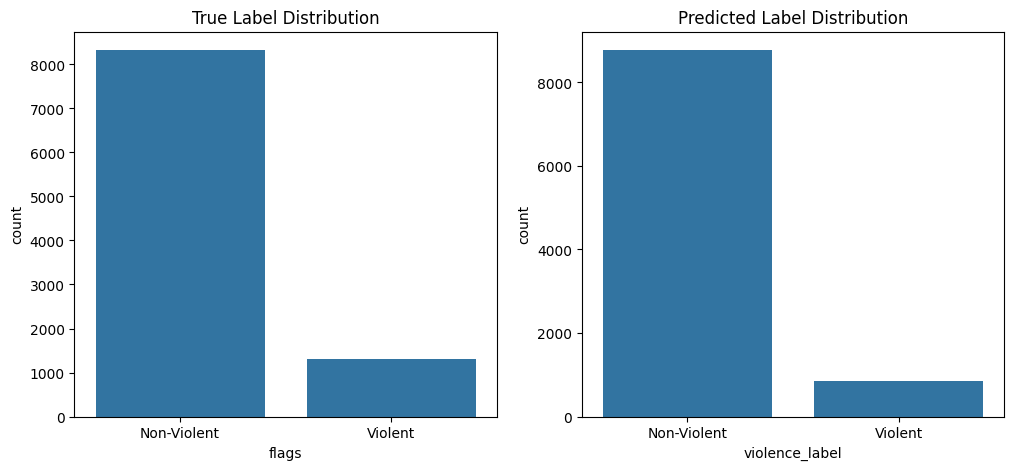

In [6]:
print("Mistral")
batch_eval(true_data, pred_data_mistral)
print("Mistral-Nemo")
batch_eval(true_data, pred_data_mistral_nemo)
print("Mistral-Small")
batch_eval(true_data, pred_data_mistral_small)
print("Qwen-8")
batch_eval(true_data, pred_data_qwen_8)
print("Qwen-14")
batch_eval(true_data, pred_data_qwen_14)
print("Gemma-12")
batch_eval(true_data, pred_data_gemma_12)
print("Gemma-27")
batch_eval(true_data, pred_data_gemma_27)

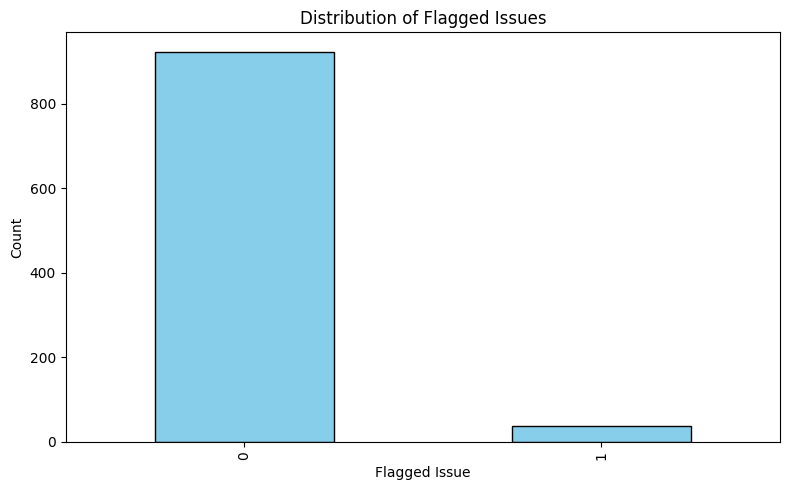

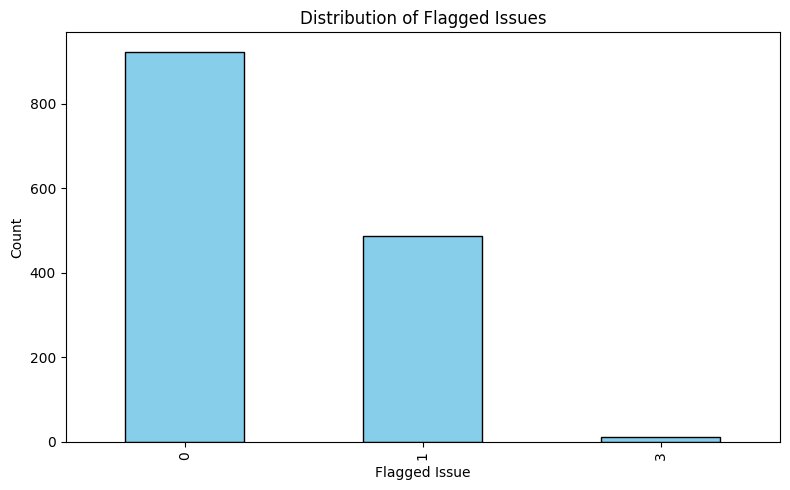

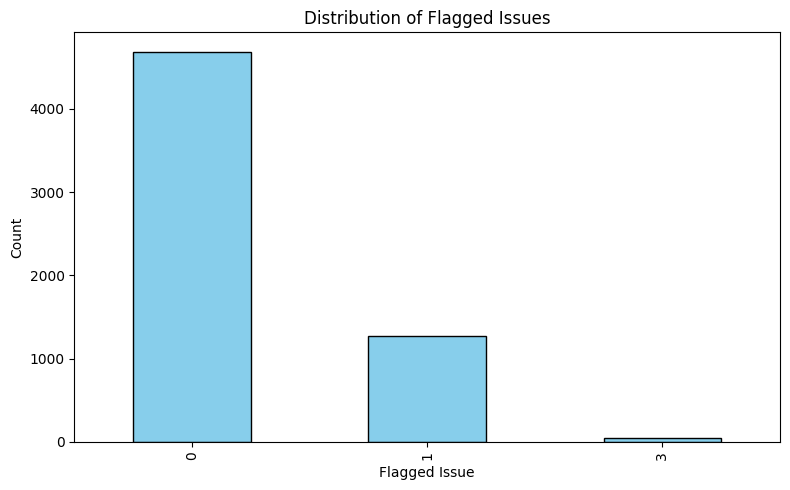

In [7]:
pred_data_div = [pred_data_mistral, pred_data_mistral_nemo, pred_data_mistral_small]

for pred_data in pred_data_div:
    
    # Ensure flagged_issues is interpreted as lists
    # pred_data["flagged_issues"] = pred_data["flagged_issues"].apply(eval)

    # Flatten the flagged issues into a single list
    all_flags = [item for sublist in pred_data["flagged_issues"] for item in sublist]

    all_flags = [item.strip("[]'\" ") for item in all_flags if item.strip("[]'\" ") not in ["", "[", "]"]]

    # Count occurrences of each flag
    flag_counts = pd.Series(all_flags).value_counts()
  
    if not flag_counts.empty:
        plt.figure(figsize=(8, 5))
        flag_counts.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Distribution of Flagged Issues")
        plt.xlabel("Flagged Issue")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("No flagged issues to plot.")

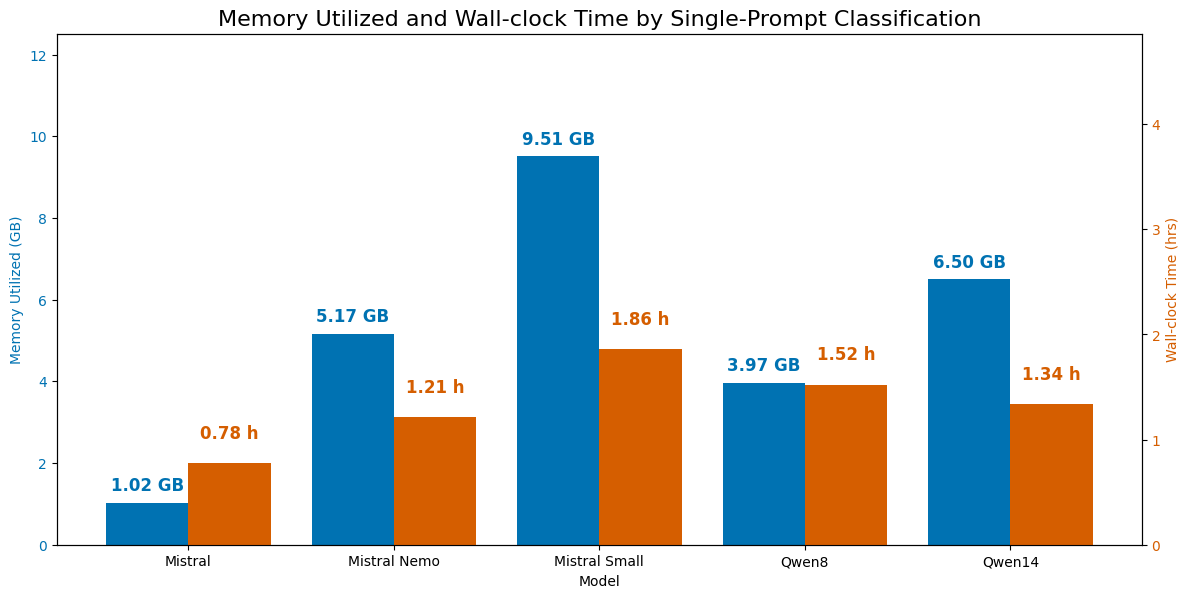

In [8]:
# Updated version with larger labels and colorblind-friendly palette

import matplotlib.pyplot as plt
import pandas as pd

# Define the data
models = ["Mistral", "Mistral Nemo", "Mistral Small", "Qwen8", "Qwen14"]
memory_utilized_gb = [1.02, 5.17, 9.51, 3.97, 6.50]
wall_clock_hours = [0 + 46/60 + 30/3600,
                    1 + 12/60 + 49/3600,
                    1 + 51/60 + 38/3600,
                    1 + 31/60 + 21/3600,
                    1 + 20/60 + 18/3600]

df = pd.DataFrame({
    "Model": models,
    "Memory Utilized (GB)": memory_utilized_gb,
    "Wall-clock Time (hrs)": wall_clock_hours
})

# Plot setup
bar_width = 0.4
index = range(len(df))
fig, ax1 = plt.subplots(figsize=(12, 7))

positions_memory = [i - bar_width/2 for i in index]
positions_time = [i + bar_width/2 for i in index]

# Memory bars (Color Universal Design: blue)
bars_memory = ax1.bar(positions_memory, df["Memory Utilized (GB)"],
                      width=bar_width, color='#0072B2', label='Memory Utilized (GB)')
ax1.set_ylabel("Memory Utilized (GB)", color='#0072B2')
ax1.tick_params(axis='y', labelcolor='#0072B2')

# Memory labels ABOVE bars
for rect in bars_memory:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2, height + 0.2,
             f'{height:.2f} GB', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#0072B2')

# Time bars (Color Universal Design: vermillion)
ax2 = ax1.twinx()
bars_time = ax2.bar(positions_time, df["Wall-clock Time (hrs)"],
                    width=bar_width, color='#D55E00', label='Wall-clock Time (hrs)')
ax2.set_ylabel("Wall-clock Time (hrs)", color='#D55E00')
ax2.tick_params(axis='y', labelcolor='#D55E00')

# Time labels ABOVE bars
for rect in bars_time:
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2, height + 0.2,
             f'{height:.2f} h', ha='center', va='bottom', fontsize=12, fontweight='bold', color='#D55E00')

# X-axis
ax1.set_xticks(index)
ax1.set_xticklabels(df["Model"], rotation=0)
ax1.set_xlabel("Model")
plt.title("Memory Utilized and Wall-clock Time by Single-Prompt Classification", fontsize=16)

# Adjust layout and axis limits for space
ax1.set_ylim(0, max(df["Memory Utilized (GB)"]) + 3)
ax2.set_ylim(0, max(df["Wall-clock Time (hrs)"]) + 3)

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.15)

plt.show()
